In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def N(mean, sigma, num):
    u = np.random.uniform(0, 1, num)
    v = np.random.uniform(0, 1, num)
    x = np.sqrt(-2*np.log(u)) * np.cos(2*np.pi*v)
    return np.array(mean + sigma * x).reshape(-1, 1)

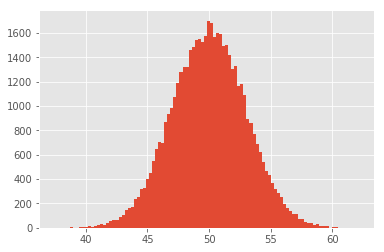

In [3]:
plt.style.use('ggplot')
plt.hist(N(50, 3, 50000), bins=100, align='mid')
plt.show()

In [4]:
NUM = 50
m_x1 = m_y1 = 1
m_x2 = m_y2 = 3
v_x1 = v_y1 = 2
v_x2 = v_y2 = 4

In [5]:
D1_x, D1_y = N(m_x1, v_x1, NUM), N(m_y1, v_y1, NUM)
D1 = np.concatenate((D1_x, D1_y), axis=1)
print("D1 datasets: ")
print(D1[:5])

D2_x, D2_y = N(m_x2, v_x2, NUM), N(m_y2, v_y2, NUM)
D2 = np.concatenate((D2_x, D2_y), axis=1)
print("\nD2 datasets: ")
print(D2[:5])

D1 datasets: 
[[ 1.32050203  2.39340128]
 [-2.08809562  0.93407259]
 [ 1.79437245  3.20050075]
 [-0.60113057 -1.20183087]
 [ 0.82058224  1.43374927]]

D2 datasets: 
[[ 8.4000633  -0.04483973]
 [-4.95347926 -2.56503991]
 [-5.1514184   0.55094311]
 [ 3.226835    4.3719662 ]
 [ 4.83546157  1.5873277 ]]


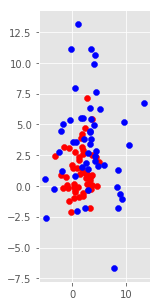

In [6]:
plt.figure(figsize=(2,5))
plt.scatter(D1[:, 0], D1[:, 1], c='r')
plt.scatter(D2[:, 0], D2[:, 1], c='b')
plt.show()

# Gradient ascent function

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def log_likelihood(X, y, w):
    z = np.dot(X, w)
    ll = np.sum(y*z - np.log(1 + np.exp(z)))
    return ll

In [9]:
def gradient_ascent(X, y, iters, lr=0.03):
    intercept = np.ones((X.shape[0], 1))
    X = np.concatenate((intercept, X), axis=1)
    weight = np.zeros((X.shape[1], 1))
    for i in range(iters):
        z = np.dot(X, weight)
        h = sigmoid(z)
        gradient = np.dot(X.T, (y - h))
        weight = weight + gradient * lr
#         if i % 100 == 0:
#             print(log_likelihood(X, y, weight))
            
    return weight

# 合併資料

In [10]:
print("D1 datasets: %s" % (D1.shape,))
print("D2 datasets: %s" % (D2.shape,))
data = np.concatenate((D1, D2), axis=0)
print("D1 + D2 datasets: %s" % (data.shape, ))

y1 = np.zeros((50, 1))
y2 = np.ones((50, 1))
output = np.concatenate((y1, y2), axis=0)
print("output datasets: %s" % (output.shape, ))

D1 datasets: (50, 2)
D2 datasets: (50, 2)
D1 + D2 datasets: (100, 2)
output datasets: (100, 1)


In [11]:
w = gradient_ascent(data, output, 10000, lr=0.5)
print(w)

[[-69.23378446]
 [ 23.22819639]
 [ 43.74407526]]


In [12]:
intercept = np.ones((data.shape[0], 1))
X = np.concatenate((intercept, data), axis=1)
zz = np.dot(X, w)
y_pred = sigmoid(zz)
yy = np.where(y_pred < 0.5, 0, 1)
yy[45:55]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1]])

# 作圖

In [13]:
D = pd.DataFrame(data, columns=['x', 'y'])
outy = pd.DataFrame(yy, columns=['class'])
myPoint = pd.concat([D, outy], axis=1)
myPoint['Group'] = output.astype(int)
myPoint.head(10)

,x,y,class,Group
0,1.320502,2.393401,1,0
1,-2.088096,0.934073,0,0
2,1.794372,3.200501,1,0
3,-0.601131,-1.201831,0,0
4,0.820582,1.433749,1,0
5,3.516485,0.808566,1,0
6,2.308407,4.702829,1,0
7,1.989930,-0.829568,0,0
8,1.868149,4.204956,1,0
9,-1.554548,3.141242,1,0


In [14]:
print("Confusion Matrix:")
print("\t     Predict cluster 1 Predict cluster 2")
predict = []
for group in range(2):
    for pred in range(2):
        predict.append(((myPoint['Group'] == group)&(myPoint['class'] == pred)).sum())
for group in range(2):
    print("Is cluster %d\t" % (group+1), end='')
    print("   %d\t\t" % predict[group*2], end='   ')
    print("   %d\t\t" % predict[group*2+1])
print("\nSensitivity (Successfully predict cluster 1): %.5f" % (predict[0] / (predict[0]+predict[1])))
print("Specificity (Successfully predict cluster 2): %.5f" % (predict[3] / (predict[2]+predict[3])))

Confusion Matrix:
	     Predict cluster 1 Predict cluster 2
Is cluster 1	   21		      29		
Is cluster 2	   10		      40		

Sensitivity (Successfully predict cluster 1): 0.42000
Specificity (Successfully predict cluster 2): 0.80000


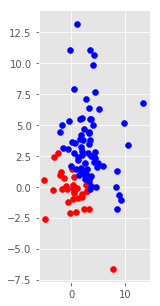

In [15]:
plt.figure(figsize=(2,5))
plt.scatter(myPoint.loc[myPoint['class'] == 0]['x'], myPoint.loc[myPoint['class'] == 0]['y'], c='r')
plt.scatter(myPoint.loc[myPoint['class'] == 1]['x'], myPoint.loc[myPoint['class'] == 1]['y'], c='b')
plt.show()

In [16]:
from numpy.linalg import inv
w = np.zeros((3, 1))

intercept = np.ones((data.shape[0], 1))
X = np.concatenate((intercept, data), axis=1)
print(X.shape)
l_g = np.zeros((3, 1))
for i in range(100000):
    z = np.dot(X, w)
    D = sigmoid(z) * (1 - sigmoid(z)) * np.identity(100)
    HJ = np.dot(X.T, np.dot(D, X))
    s = sigmoid(z) - output
    grad = np.dot(inv(HJ), np.dot(X.T, s))

    if grad.sum() < 1e-50:
        print("break in %d" % i)
        break
    else:
        l_g = grad    
        
    w = w - grad
# print(w)

(100, 3)
break in 5


In [17]:
intercept = np.ones((data.shape[0], 1))
X = np.concatenate((intercept, data), axis=1)
print(w)
zz = np.dot(X, w)
y_pred = sigmoid(zz)
yy = np.where(y_pred < 0.5, 0, 1)

[[-0.98737042]
 [ 0.19233945]
 [ 0.25389852]]


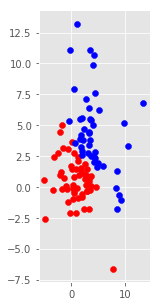

In [18]:
D = pd.DataFrame(data, columns=['x', 'y'])
outy = pd.DataFrame(yy, columns=['class'])
myPoint = pd.concat([D, outy], axis=1)
myPoint['Group'] = output.astype(int)
myPoint.head(10)
plt.figure(figsize=(2,5))
plt.scatter(myPoint.loc[myPoint['class'] == 0]['x'], myPoint.loc[myPoint['class'] == 0]['y'], c='r')
plt.scatter(myPoint.loc[myPoint['class'] == 1]['x'], myPoint.loc[myPoint['class'] == 1]['y'], c='b')
plt.show()

# 統計

In [19]:
print("Confusion Matrix:")
print("\t     Predict cluster 1 Predict cluster 2")
predict = []
for group in range(2):
    for pred in range(2):
        predict.append(((myPoint['Group'] == group)&(myPoint['class'] == pred)).sum())
for group in range(2):
    print("Is cluster %d\t" % (group+1), end='')
    print("   %d\t\t" % predict[group*2], end='   ')
    print("   %d\t\t" % predict[group*2+1])
print("\nSensitivity (Successfully predict cluster 1): %.5f" % (predict[0] / (predict[0]+predict[1])))
print("Specificity (Successfully predict cluster 2): %.5f" % (predict[3] / (predict[2]+predict[3])))

Confusion Matrix:
	     Predict cluster 1 Predict cluster 2
Is cluster 1	   39		      11		
Is cluster 2	   16		      34		

Sensitivity (Successfully predict cluster 1): 0.78000
Specificity (Successfully predict cluster 2): 0.68000


In [20]:
from PIL import Image
from matplotlib.pyplot import imshow, imsave

In [21]:
with open("train-images.idx3-ubyte", "rb") as f:
    byte = f.read(4)
    magic_num = int.from_bytes(byte,byteorder='big')
    print('magic_num = %d' % magic_num)
    
    byte = f.read(4)
    total_img = int.from_bytes(byte,byteorder='big')
    print('total_img = %d' % total_img)
    
    byte = f.read(4)
    rows = int.from_bytes(byte,byteorder='big')
    print('rows = %d' % rows)
    
    byte = f.read(4)
    cols = int.from_bytes(byte,byteorder='big')
    print('cols = %d' % cols)
    
    total = []
    for epoch in range(total_img):
        pic = []
        for i in range(28):
            l = []
            for j in range(28):
                byte = f.read(1)
                l.append(int.from_bytes(byte,byteorder='big', signed=False))
            pic.append(np.asarray(l))
        total.append(pic)
    a = np.array(total).reshape(60000, 784)

magic_num = 2051
total_img = 60000
rows = 28
cols = 28


In [22]:
a = np.where(a < 128, 0, 1)

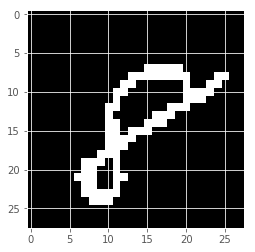

In [23]:
imshow(a[59999].reshape(28,28), cmap='gray')
plt.show()

各數字初始機率: 
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

各數字在不同pixel出現為"0"初始機率: 
 [[0.55 0.55 0.55 ... 0.55 0.55 0.55]
 [0.55 0.55 0.55 ... 0.55 0.55 0.55]
 [0.55 0.55 0.55 ... 0.55 0.55 0.55]
 ...
 [0.55 0.55 0.55 ... 0.55 0.55 0.55]
 [0.55 0.55 0.55 ... 0.55 0.55 0.55]
 [0.55 0.55 0.55 ... 0.55 0.55 0.55]]
iter: 0


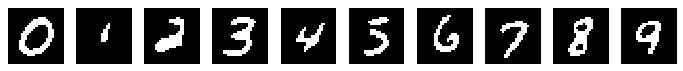

iter: 1


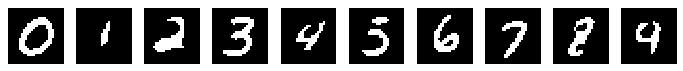

iter: 2


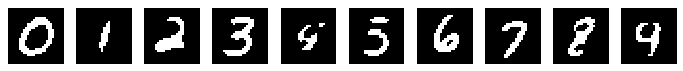

iter: 3


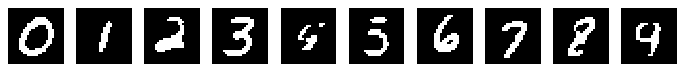

iter: 4


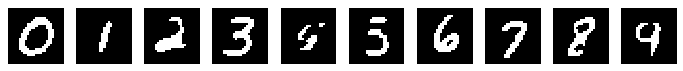

iter: 5


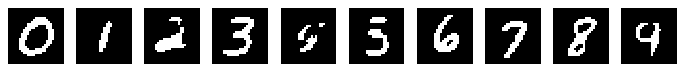

iter: 6


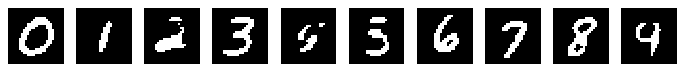

iter: 7


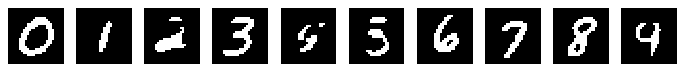

iter: 8


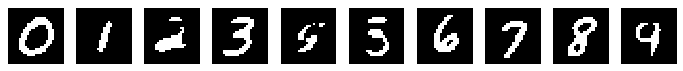

iter: 9


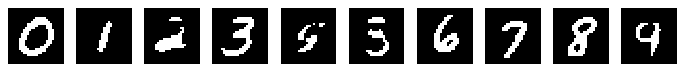

In [29]:
class_p = np.full(10, 0.1)
print("各數字初始機率: \n", class_p)

num_index = [1, 8, 5, 7, 9, 0, 32, 15, 41, 4]
prob = np.where(a[num_index] < 1, 0.55, 0.45)

print("\n各數字在不同pixel出現為\"0\"初始機率: \n", prob)

TOTAL = 2500

# E step:
for times in range(10): 
    # w (數字類別 , 第幾張) 的機率
    w = np.ones((10, TOTAL))
    # 算所有圖片
    for picture in range(TOTAL):
        # 計算這張照片在 0-9 的機率為
        for pixel_class in range(10):
            w[pixel_class, picture] = w[pixel_class, picture] * class_p[pixel_class]
            for pixel, pixel_value in enumerate(a[picture]):
                pixel_porb = prob[pixel_class, pixel]
                if pixel_value == 1:
                    pixel_porb = 1 - prob[pixel_class, pixel]
                w[pixel_class, picture] = w[pixel_class, picture] * pixel_porb
                if pixel % 7 == 0:
                    w[pixel_class, picture] = w[pixel_class, picture] * 100
        w[:, picture] = w[:, picture] / w[:, picture].sum()
    
# M step:
    # 1. 更新各數字出現機率
    class_p = w.sum(axis=1) / TOTAL
    # 2. 更新各數字在不同 pixel 出現為 "0" 機率
    for pixel_class in range(10):
        for pixel in range(784):
            prob[pixel_class, pixel] = w[pixel_class, np.where(a[:TOTAL, pixel] == 0)].sum() / w[pixel_class, :TOTAL].sum()
    
    # 作圖
    print("iter: %d" % times)
    fig, figarr = plt.subplots(1, 10, figsize=(12, 12))
    for number in range(10):
        tmp = np.where(prob[number, :] > 0.5, 0, 1).reshape(28, 28)
        figarr[number].imshow(tmp, cmap='gray')
        figarr[number].axes.get_xaxis().set_visible(False)
        figarr[number].axes.get_yaxis().set_visible(False)
    plt.show()

In [30]:
with open("train-labels.idx1-ubyte", "rb") as f:
    
    byte = f.read(4)
    magic_num = int.from_bytes(byte,byteorder='big')
    print('magic_num = %d' % magic_num)
    
    byte = f.read(4)
    total_label = int.from_bytes(byte,byteorder='big')
    print('total_label = %d' % total_label)
    
    ans = []
    ans_dict={}
    for i in range(10):
        ans_dict[i] = []
        
    for i in range(total_label):
        byte = f.read(1)
        label = int.from_bytes(byte,byteorder='big')
        ans_dict[label].append(i)
        ans.append(label)

magic_num = 2049
total_label = 60000


# 檢驗答案

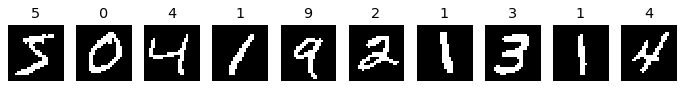

In [34]:
fig, figarr = plt.subplots(1, 10, figsize=(12, 12))
for number in range(10):
    tmp = a[number].reshape(28, 28)
    figarr[number].imshow(tmp, cmap='gray')
    figarr[number].set_title(ans[number])
    figarr[number].axes.get_xaxis().set_visible(False)
    figarr[number].axes.get_yaxis().set_visible(False)
plt.show()

In [38]:
EM_ans = np.where(prob >= 0.5, 0, 1)

In [39]:
EM_ans.shape

(10, 784)

# EM歸類的答案

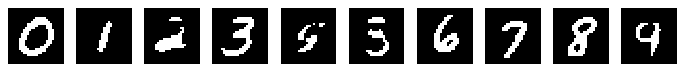

In [45]:
fig, figarr = plt.subplots(1, 10, figsize=(12, 12))
for number in range(10):
    tmp = EM_ans[number].reshape(28, 28)
    figarr[number].imshow(tmp, cmap='gray')
#     figarr[number].set_title(ans[number])
    figarr[number].axes.get_xaxis().set_visible(False)
    figarr[number].axes.get_yaxis().set_visible(False)
plt.show()

In [62]:
for i in range(10):
    print(len(np.where((a[0,:] - EM_ans[i,:]) == 0)[0]))

641
664
645
690
661
684
664
678
665
656


In [72]:
tmp = np.where((a[0,:] - EM_ans[:,:]) == 0, 1, 0)

In [77]:
for n in range(10, 25):
    tmp = np.where((a[n,:] - EM_ans[:,:]) == 0, 1, 0)
    print("predict: %d, ans: %d" % (np.argmax(tmp.sum(axis=1).reshape(10,-1)), ans[n]))
#     print("ans: ")

predict: 3, ans: 3
predict: 1, ans: 5
predict: 5, ans: 3
predict: 6, ans: 6
predict: 1, ans: 1
predict: 7, ans: 7
predict: 2, ans: 2
predict: 8, ans: 8
predict: 5, ans: 6
predict: 7, ans: 9
predict: 9, ans: 4
predict: 0, ans: 0
predict: 4, ans: 9
predict: 1, ans: 1
predict: 4, ans: 1


In [89]:
cm = np.zeros((10,10))
for n in range(60000):
    tmp = np.where((a[n,:] - EM_ans[:,:]) == 0, 1, 0)
    cm[ans[n], np.argmax(tmp.sum(axis=1).reshape(10,-1))] += 1

In [100]:
np.set_printoptions(suppress=True)
cm.astype(int)

array([[4403,  155,   21,  131,  270,  440,  306,  122,   55,   20],
       [   0, 6653,    7,    2,   19,   29,    6,   13,   11,    2],
       [  64, 1537, 2976,  297,  226,  227,   72,  211,  241,  107],
       [  27,  559,   36, 2167,   72, 2921,   40,  118,  102,   89],
       [   4,  495,  145,    0, 1181,   13,  188,  396,   15, 3405],
       [  98,  554,   23,  387, 1259, 2243,   88,  191,  215,  363],
       [  99,  789,  395,    8,  456,  152, 3688,    3,    9,  319],
       [  20,  917,   15,    1,  120,   21,    6, 3628,   13, 1524],
       [  35,  924,   62,  189,  172, 1352,   51,  219, 2592,  255],
       [  39,  488,   69,   28,  306,  150,   28, 1869,   18, 2954]])

In [105]:
for number in range(10):
    print("Confusion Matrix %d" % number)
    print("\t     Predict number %d Predict not number %d" % (number, number))
    a = cm[number, number]
    b = cm[number, :number].sum() + cm[number, number+1:].sum()
    c = cm[:number, number].sum() + cm[number+1:, number].sum()
    d = cm[:number, :number].sum() + cm[:number, number+1:].sum()+\
        cm[number+1:, :number].sum() + cm[number+1:, number+1:].sum()
    print("Is number %d\t   %d\t\t   %d\t\t" % (number, a, b))
    print("Is not number %d\t   %d\t\t  %d\t\t" % (number, c, d))
    print("\nSensitivity (Successfully predict number %d): %.5f" % (number, a / (a+b)))
    print("Specificity (Successfully predict number %d): %.5f" % (number, d / (c+d)))
    print("\n------------------------------------------------\n")

Confusion Matrix 0
	     Predict number 0 Predict not number 0
Is number 0	   4403		   1520		
Is not number 0	   386		  53691		

Sensitivity (Successfully predict number 0): 0.74337
Specificity (Successfully predict number 0): 0.99286

------------------------------------------------

Confusion Matrix 1
	     Predict number 1 Predict not number 1
Is number 1	   6653		   89		
Is not number 1	   6418		  46840		

Sensitivity (Successfully predict number 1): 0.98680
Specificity (Successfully predict number 1): 0.87949

------------------------------------------------

Confusion Matrix 2
	     Predict number 2 Predict not number 2
Is number 2	   2976		   2982		
Is not number 2	   773		  53269		

Sensitivity (Successfully predict number 2): 0.49950
Specificity (Successfully predict number 2): 0.98570

------------------------------------------------

Confusion Matrix 3
	     Predict number 3 Predict not number 3
Is number 3	   2167		   3964		
Is not number 3	   1043		  52826		

Sensitivity (

In [107]:
acc = 0
for i in range(10):
    acc += cm[i, i]
print("Error rate: %.5f" % (1 - acc / 60000))

Error rate: 0.45858
